# **Simple Rules Lightning Programming Challenges**

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for viewing this notebook:

````
jt -t grade3 -cellw=90% -fs=14 -tfs=14 -ofs=14
````

- Welcome to the in-class lightning programming challenges!
- In this notebook, you'll use your python programming skills to search for the best simple rules that fit our training data.


## A Couple Ground Rules

- You're free to use the internet, and previous notebooks from this series.
- You are not premitted to watch the YouTube videos, that would be too easy!
- Note that we're using differnt training and testing examples here, so results may be different than the videos anyway.

## Import Tools

In [1]:
%pylab inline
import pickle, sys

sys.path.append('../util')
from data_handling import extractExamplesFromList, findUniqueRowsAndCount
from viz import showMatches, bw, rw, rwb, testLogicalRules
from data_handling import extractFeatures
from image import makeGrayScale

Populating the interactive namespace from numpy and matplotlib


## Load up Data

In [2]:
#Load data:
with open('../data/training_data.p', 'rb') as f:
    data = pickle.load(f)

In [3]:
#Let's pick a few examples to experiment with:
exampleIndices = [8, 9, 10]

#Examples we didn't train on:
testingExampleIndices = [11, 12]

In [4]:
# Extract 9x9 example grids and correct labels from our 3 images:
examples = [data[index] for index in exampleIndices]
X, y = extractExamplesFromList(examples, whichImage = 'image1bit', dist = 4)

In [5]:
X.shape

(7295, 81)

In [6]:
y.shape

(7295,)

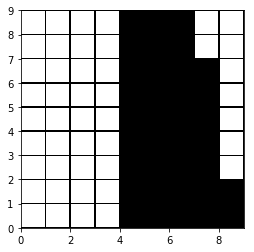

In [7]:
#Visualize random training example
exampleToShow = X[600,:].reshape(9,9)
fig = figure(0, (4,4))
pcolor(flipud(exampleToShow), cmap = 'Greys',  linewidth =.5, color = 'k', vmin = 0, vmax = 1)

---

## **Challenge 1: Best 1-pixel rule**

- Your first challenge is to find the 1-pixel that delivers the best performance on our training data. 
- Bonus: how much better is this rule than the next best performing rule?
- Bonus: how does our rule do out of sample?
- To be sure that it's clear what you're looking for here, your answer might be something like this:

In [8]:
ruleVector = np.zeros(81)
ruleVector[22] = 1

In [9]:
ruleVector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

This rules means that examples with a 1 in the 23rd position will be labeled as fingers and examples with a 0 in the 23rd position will be labeled as non-fingers. We can visualize the rule like this:

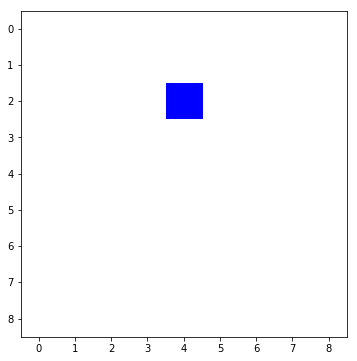

In [10]:
fig = figure(0, (6,6))
imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = bw)

---

## **Challenge 2: Best 2-pixel rule**

- Your second challenge is to find the 2-pixel that delivers the best performance on our training data. 
- Bonus: how much better is this rule than the next best performing rule?
- Bonus: how does our rule do out of sample?
- To be sure that it's clear what you're looking for here, your answer might be something like this:

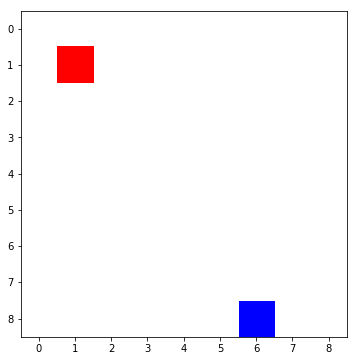

In [11]:
ruleVector = np.zeros(81)
ruleVector[10] = -1
ruleVector[78] = 1

fig = figure(0, (6,6))
imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = rwb)

This rules means that examples with a 1 in the 78th position and a 0 in the 10th position will be labeled as finger pixels. For challenge 2 you can use fancy visualization if you want, but you need to rewrite the rules using they built-in python lambda method:

Confusion Matrix:
[[ 194  233]
 [ 648 6220]]
Recall (TPR) = 0.454 (Portion of fingers that we "caught")
Precision (PPV) = 0.23(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.879


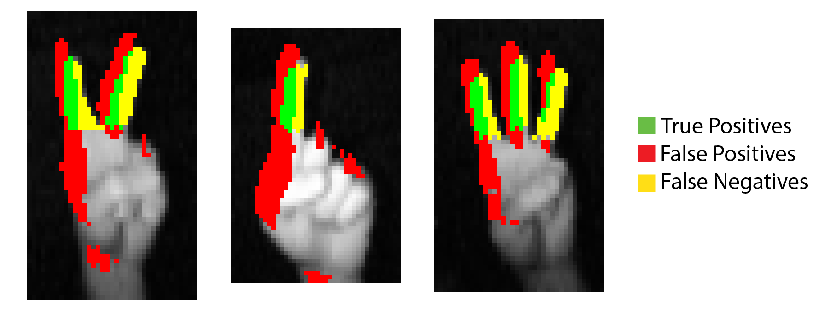

In [12]:
#Try our out rule on training Data:
rule = lambda X: np.logical_and(X[:, 10] == 0, X[:,78] == 1)

fig = figure(0, (14, 8))
testLogicalRules(exampleIndices, data, fig, X, y, rule)

---

## **Challenge 3: Best 3-pixel rule**
- Your third challenge is to find the 3-pixel that delivers the best performance on our training data. 

---

## **Challenge 4: (You guessed it) Best 4-pixel rule**
- Your fourth challenge is to find the 4-pixel that delivers the best performance on our training data. 